 # Bước 1: Import thư viện

In [ ]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình

# Bước 2: Đọc dữ liệu

In [ ]:
    df = pd.read_excel('../Assest/data/dulieu.xlsx')

In [3]:
#dữ liệu 5 dòng đầu
df.head()

,Unnamed: 0,time,open,high,low,close,volume,MA50,MA200,sup,Buy_signal,Sell_signal
0,0,2013-01-02,19640,19790,19590,19790,90770,19790.000000,19790.000000,0.0,0,0
1,1,2013-01-03,19790,20040,19690,19790,1618510,19790.000000,19790.000000,NaN,0,0
2,2,2013-01-04,20150,20400,19790,20250,1318980,19943.333333,19943.333333,NaN,0,0
3,3,2013-01-07,20400,20450,20250,20250,701600,20020.000000,20020.000000,NaN,0,0
4,4,2013-01-08,20190,21010,20100,20700,871680,20156.000000,20156.000000,NaN,0,0


# Bước 3: Mô tả dữ liệu

In [4]:
#định dạng cấu trúc thời gian
df["time"] = pd.to_datetime(df.time, format="%Y-%m-%d")

#kích thước dữ liệu
df.shape

#xác định kiểu dữ liệu
df.info()

#mô tả bộ dữ liệu
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   2800 non-null   int64         
 1   time         2800 non-null   datetime64[ns]
 2   open         2800 non-null   int64         
 3   high         2800 non-null   int64         
 4   low          2800 non-null   int64         
 5   close        2800 non-null   int64         
 6   volume       2800 non-null   int64         
 7   MA50         2800 non-null   float64       
 8   MA200        2800 non-null   float64       
 9   sup          2794 non-null   float64       
 10  Buy_signal   2800 non-null   int64         
 11  Sell_signal  2800 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 262.6 KB


,Unnamed: 0,time,open,high,low,close,volume,MA50,MA200,sup,Buy_signal,Sell_signal
count,2800.000000,2800,2800.000000,2800.000000,2800.000000,2800.000000,2.800000e+03,2800.00000,2800.000000,2794.000000,2800.000000,2800.000000
mean,1399.500000,2018-08-17 15:54:00,57771.999286,58543.263571,57001.083571,57716.315714,6.153748e+05,57213.62448,55744.291734,57861.749067,0.012857,0.012857
min,0.000000,2013-01-02 00:00:00,17380.000000,17720.000000,17210.000000,17320.000000,3.086000e+04,19790.00000,19790.000000,0.000000,0.000000,0.000000
25%,699.750000,2015-10-29 18:00:00,37770.000000,38310.000000,37400.000000,37770.000000,2.963550e+05,37667.58500,37717.075000,38247.325359,0.000000,0.000000
50%,1399.500000,2018-08-18 12:00:00,59820.000000,60700.000000,58730.000000,59820.000000,5.044500e+05,59823.02000,56097.460000,60606.965419,0.000000,0.000000
75%,2099.250000,2021-06-08 06:00:00,75685.000000,76402.500000,74882.500000,75520.000000,7.908750e+05,75226.00000,71702.202500,76397.042571,0.000000,0.000000
max,2799.000000,2024-03-25 00:00:00,102560.000000,104910.000000,100440.000000,104910.000000,4.515800e+06,89808.20000,88514.550000,109698.097222,1.000000,1.000000
std,808.434702,NaN,20811.229597,21125.291534,20486.579832,20781.400694,4.637070e+05,20613.79648,20078.883386,21260.338648,0.112678,0.112678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   2800 non-null   int64         
 1   time         2800 non-null   datetime64[ns]
 2   open         2800 non-null   int64         
 3   high         2800 non-null   int64         
 4   low          2800 non-null   int64         
 5   close        2800 non-null   int64         
 6   volume       2800 non-null   int64         
 7   MA50         2800 non-null   float64       
 8   MA200        2800 non-null   float64       
 9   sup          2794 non-null   float64       
 10  Buy_signal   2800 non-null   int64         
 11  Sell_signal  2800 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 262.6 KB


# Bước 4: Tiền xử lý dữ liệu

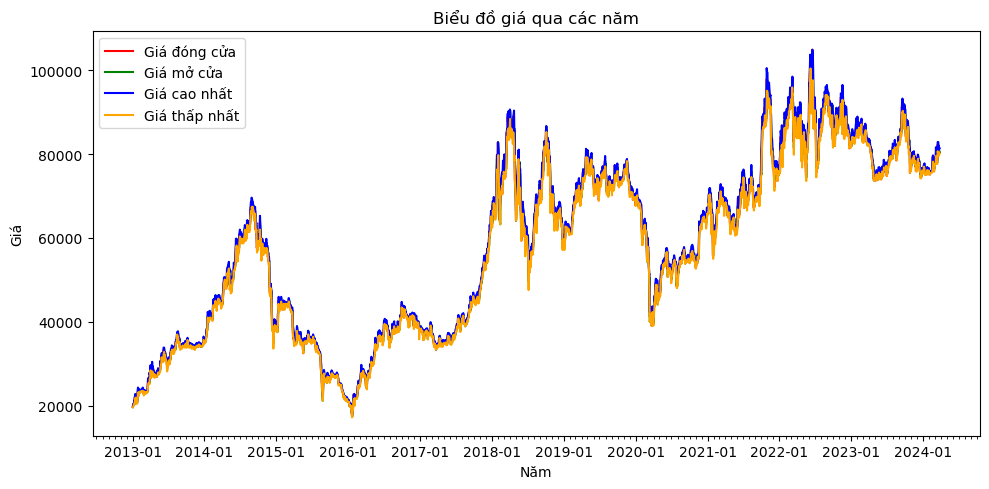

In [6]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator


# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='time')

# Tạo đồ thị giá đóng cửa, giá mở cửa, giá cao nhất, và giá thấp nhất qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['time'], df['close'], label='Giá đóng cửa', color='red')
plt.plot(df['time'], df['open'], label='Giá mở cửa', color='green')
plt.plot(df['time'], df['high'], label='Giá cao nhất', color='blue')
plt.plot(df['time'], df['low'], label='Giá thấp nhất', color='orange')

plt.xlabel('Năm')
plt.ylabel('Giá')
plt.title('Biểu đồ giá qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y-%m')
months = MonthLocator()
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

In [7]:

df1 = pd.DataFrame(df,columns=['time','close', 'open', 'high', 'low'])
df1.index = df1.time
df1.drop('time',axis=1,inplace=True)
df1

,close,open,high,low
time,,,,
2013-01-02,19790,19640,19790,19590
2013-01-03,19790,19790,20040,19690
2013-01-04,20250,20150,20400,19790
2013-01-07,20250,20400,20450,20250
2013-01-08,20700,20190,21010,20100
...,...,...,...,...
2024-03-19,79700,81000,81000,79700
2024-03-20,81000,80000,81200,79600
2024-03-21,81000,81900,81900,80500


In [8]:
#chia tập dữ liệu
data = df1.values
train_data = data[:1500]
test_data = data[1500:]

In [9]:
data

array([[19790, 19640, 19790, 19590],
       [19790, 19790, 20040, 19690],
       [20250, 20150, 20400, 19790],
       ...,
       [81000, 81900, 81900, 80500],
       [80500, 81000, 81500, 80400],
       [80400, 80500, 81400, 80100]], dtype=int64)

In [10]:
#chuẩn hóa dữ liệu

sc = MinMaxScaler(feature_range=(0, 1))
sc_train = sc.fit_transform(data)  # Chỉ sử dụng train_data để fit scaler



In [11]:
#tạo vòng lặp các giá trị
x_train, y_train = [], []
for i in range(50, len(train_data)):
    x_train.append(sc_train[i-50:i, 0:4])  # Lấy 50 giá trị liên tiếp, bao gồm cả close và open, high, low
    y_train.append(sc_train[i, 0:4])  # Lấy ra giá close và open, high, low ngày hôm sau



In [12]:
# x_train
# y_train


In [13]:
#xếp dữ liệu thành 1 mảng 2 chiều
x_train = np.array(x_train)
y_train = np.array(y_train)

#xếp lại dữ liệu thành mảng 1 chiều
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],4))
y_train = np.reshape(y_train,(y_train.shape[0],4))

# Bước 5: Xây dựng và huấn luyện mô hình

In [14]:
# Xây dựng mô hình
model = Sequential()  # Tạo lớp mạng cho dữ liệu đầu vào

# Thêm 2 lớp LSTM mới, tổng cộng là 3 lớp LSTM với tham số return_sequences=True
model.add(LSTM(units=128, input_shape=(x_train.shape[1], 4), return_sequences=True))
model.add(Dropout(0.2))  # Thêm Dropout để giảm overfitting sau mỗi lớp LSTM

model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))  # Thêm Dropout

model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))  # Thêm Dropout

# Lớp LSTM cuối cùng không cần tham số return_sequences vì đây là lớp cuối trước khi kết nối với Dense layer
model.add(LSTM(units=64))
model.add(Dropout(0.5))  # Giữ nguyên Dropout như lớp LSTM cuối cũ trong mô hình ban đầu

model.add(Dense(4))  # Output đầu ra 1 chiều

# Đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error', optimizer='adam')


C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
#huấn luyện mô hình
save_model = "../model/models3.keras"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])


Epoch 1/100

Epoch 1: loss improved from inf to 0.10200, saving model to ../model/models3.keras
29/29 - 5s - 169ms/step - loss: 0.1020
Epoch 2/100

Epoch 2: loss improved from 0.10200 to 0.07138, saving model to ../model/models3.keras
29/29 - 2s - 71ms/step - loss: 0.0714
Epoch 3/100

Epoch 3: loss improved from 0.07138 to 0.06472, saving model to ../model/models3.keras
29/29 - 2s - 73ms/step - loss: 0.0647
Epoch 4/100

Epoch 4: loss improved from 0.06472 to 0.05727, saving model to ../model/models3.keras
29/29 - 2s - 78ms/step - loss: 0.0573
Epoch 5/100

Epoch 5: loss improved from 0.05727 to 0.05309, saving model to ../model/models3.keras
29/29 - 2s - 68ms/step - loss: 0.0531
Epoch 6/100

Epoch 6: loss improved from 0.05309 to 0.05129, saving model to ../model/models3.keras
29/29 - 2s - 65ms/step - loss: 0.0513
Epoch 7/100

Epoch 7: loss improved from 0.05129 to 0.04805, saving model to ../model/models3.keras
29/29 - 2s - 69ms/step - loss: 0.0480
Epoch 8/100

Epoch 8: loss improved f

29/29 - 2s - 81ms/step - loss: 0.0205
Epoch 70/100

Epoch 70: loss improved from 0.02052 to 0.02018, saving model to ../model/models3.keras
29/29 - 2s - 79ms/step - loss: 0.0202
Epoch 71/100

Epoch 71: loss did not improve from 0.02018
29/29 - 2s - 73ms/step - loss: 0.0208
Epoch 72/100

Epoch 72: loss did not improve from 0.02018
29/29 - 2s - 78ms/step - loss: 0.0204
Epoch 73/100

Epoch 73: loss did not improve from 0.02018
29/29 - 2s - 78ms/step - loss: 0.0213
Epoch 74/100

Epoch 74: loss improved from 0.02018 to 0.02009, saving model to ../model/models3.keras
29/29 - 2s - 84ms/step - loss: 0.0201
Epoch 75/100

Epoch 75: loss did not improve from 0.02009
29/29 - 2s - 76ms/step - loss: 0.0209
Epoch 76/100

Epoch 76: loss did not improve from 0.02009
29/29 - 2s - 76ms/step - loss: 0.0202
Epoch 77/100

Epoch 77: loss did not improve from 0.02009
29/29 - 2s - 72ms/step - loss: 0.0209
Epoch 78/100

Epoch 78: loss did not improve from 0.02009
29/29 - 2s - 75ms/step - loss: 0.0203
Epoch 79/1

In [16]:
#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model("../model/models3.keras")
y_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) #giá dự đoán

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


# Bước 6: Tái sử dụng mô hình

In [17]:

# Xử lý dữ liệu test
test = df1[len(train_data)-50:].values  # Lấy dữ liệu test với cả hai cột

# Sử dụng MinMaxScaler đã được fit với cả hai cột để biến đổi
sc_test = sc.transform(test)

x_test, y_test = [], []
for i in range(50, test.shape[0]):
    x_test.append(sc_test[i-50:i])
x_test = np.array(x_test)

# Đối với mô hình LSTM, dữ liệu đầu vào cần được reshape thành [samples, time steps, features]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 4))

# Sau đó, bạn có thể sử dụng mô hình để dự đoán
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)  # Chuyển dữ liệu dự đoán về dạng ban đầu


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


# Độ chính xác của mô hình

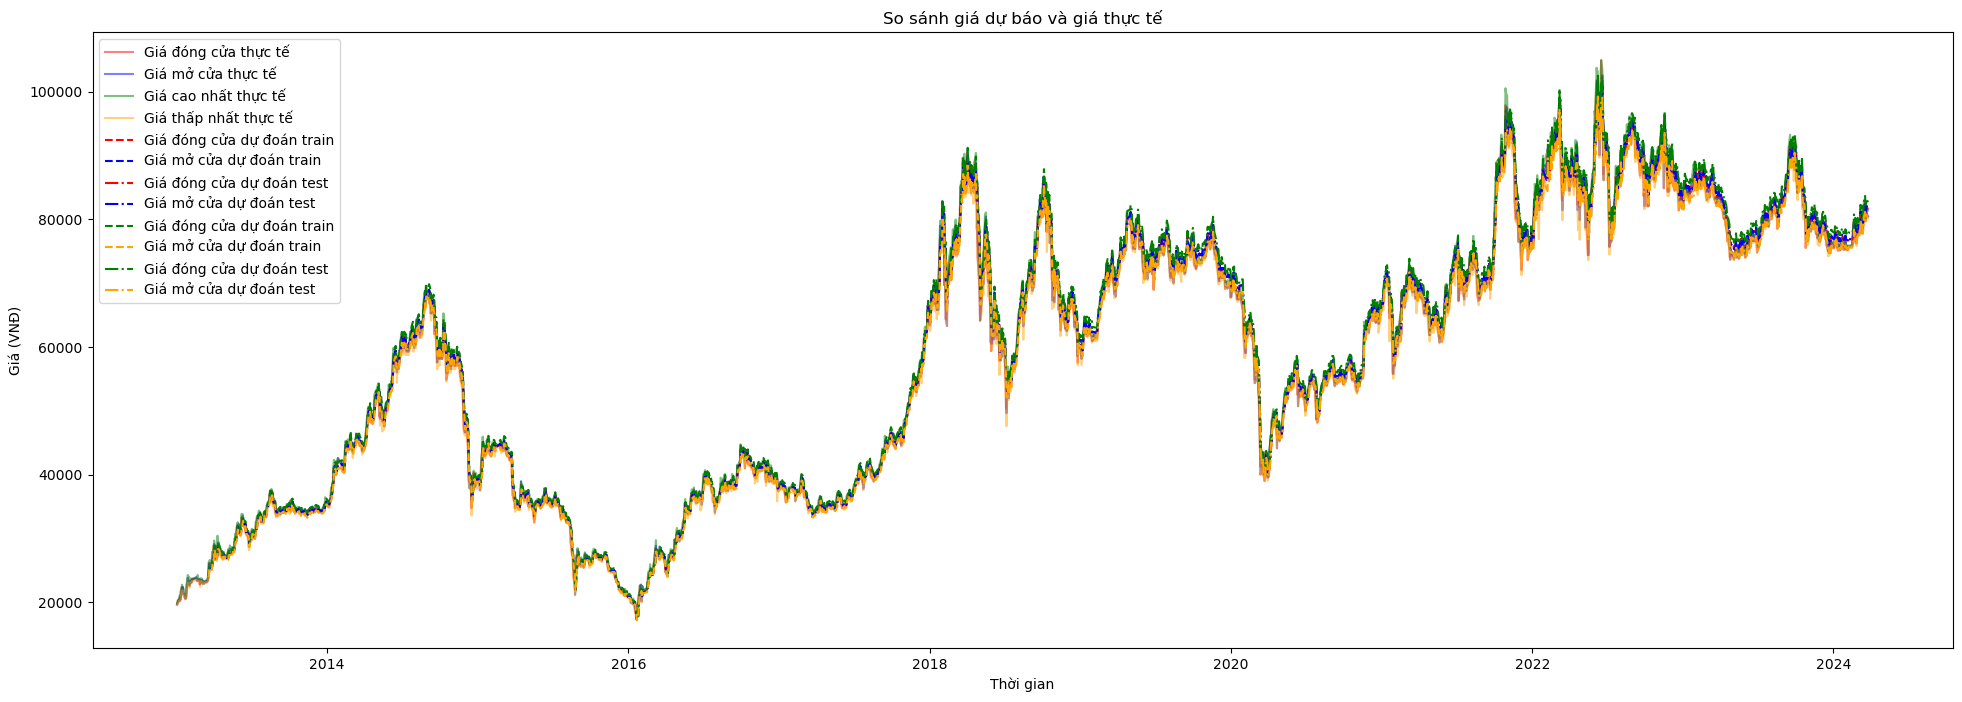

In [18]:

# Chuẩn bị dữ liệu cho việc vẽ biểu đồ
train_data1 = df1.iloc[50:1500].copy()  # Sử dụng .copy() để tránh cảnh báo SettingWithCopy
test_data1 = df1.iloc[1500:].copy()

# Cập nhật DataFrame với dữ liệu dự đoán
train_data1['Dự đoán Close'] = y_train_predict[:, 0]  # Cột đầu tiên cho 'close'
train_data1['Dự đoán Open'] = y_train_predict[:, 1]  # Cột thứ hai cho 'open'

test_data1['Dự đoán Close'] = y_test_predict[:, 0]  # Tương tự cho dữ liệu kiểm tra
test_data1['Dự đoán Open'] = y_test_predict[:, 1]

train_data1['Dự đoán High'] = y_train_predict[:, 2]  # Cột thứ 3 cho 'high'
train_data1['Dự đoán Low'] = y_train_predict[:, 3]  # Cột thứ 4 cho 'low'

test_data1['Dự đoán High'] = y_test_predict[:, 2]  # Tương tự cho dữ liệu kiểm tra
test_data1['Dự đoán Low'] = y_test_predict[:, 3]

plt.figure(figsize=(24,8))

# Vẽ giá 'close' và 'open' thực tế
plt.plot(df1.index, df1['close'], label='Giá đóng cửa thực tế', color='red', alpha=0.5)
plt.plot(df1.index, df1['open'], label='Giá mở cửa thực tế', color='blue', alpha=0.5)
plt.plot(df1.index, df1['high'], label='Giá cao nhất thực tế', color='green', alpha=0.5)
plt.plot(df1.index, df1['low'], label='Giá thấp nhất thực tế', color='orange', alpha=0.5)

# Vẽ giá dự đoán 'close' và 'open' cho dữ liệu huấn luyện và kiểm tra
plt.plot(train_data1.index, train_data1['Dự đoán Close'], label='Giá đóng cửa dự đoán train', color='red', linestyle='--')
plt.plot(train_data1.index, train_data1['Dự đoán Open'], label='Giá mở cửa dự đoán train', color='blue', linestyle='--')

plt.plot(test_data1.index, test_data1['Dự đoán Close'], label='Giá đóng cửa dự đoán test', color='red', linestyle='-.')
plt.plot(test_data1.index, test_data1['Dự đoán Open'], label='Giá mở cửa dự đoán test', color='blue', linestyle='-.')

plt.plot(train_data1.index, train_data1['Dự đoán High'], label='Giá đóng cửa dự đoán train', color='green', linestyle='--')
plt.plot(train_data1.index, train_data1['Dự đoán Low'], label='Giá mở cửa dự đoán train', color='orange', linestyle='--')

plt.plot(test_data1.index, test_data1['Dự đoán High'], label='Giá đóng cửa dự đoán test', color='green', linestyle='-.')
plt.plot(test_data1.index, test_data1['Dự đoán Low'], label='Giá mở cửa dự đoán test', color='orange', linestyle='-.')

plt.title('So sánh giá dự báo và giá thực tế')
plt.xlabel('Thời gian')
plt.ylabel('Giá (VNĐ)')
plt.legend()
plt.show()

In [19]:

# Đánh giá cho 'close'
print('Đánh giá cho giá đóng cửa trên tập train:')
print('R^2 (Độ phù hợp):', r2_score(y_train[:, 0], y_train_predict[:, 0]))
print('MAE (Sai số tuyệt đối trung bình):', mean_absolute_error(y_train[:, 0], y_train_predict[:, 0]))
print('MAPE (Phần trăm sai số tuyệt đối trung bình):', mean_absolute_percentage_error(y_train[:, 0], y_train_predict[:, 0]))

# Đánh giá cho 'open'
print('\nĐánh giá cho giá mở cửa trên tập train:')
print('R^2 (Độ phù hợp):', r2_score(y_train[:, 1], y_train_predict[:, 1]))
print('MAE (Sai số tuyệt đối trung bình):', mean_absolute_error(y_train[:, 1], y_train_predict[:, 1]))
print('MAPE (Phần trăm sai số tuyệt đối trung bình):', mean_absolute_percentage_error(y_train[:, 1], y_train_predict[:, 1]))


# Đánh giá cho 'high'
print('\nĐánh giá cho giá cao nhất trên tập train:')
print('R^2 (Độ phù hợp):', r2_score(y_train[:, 2], y_train_predict[:, 2]))
print('MAE (Sai số tuyệt đối trung bình):', mean_absolute_error(y_train[:, 2], y_train_predict[:, 2]))
print('MAPE (Phần trăm sai số tuyệt đối trung bình):', mean_absolute_percentage_error(y_train[:, 2], y_train_predict[:, 2]))

# Đánh giá cho 'low'
print('\nĐánh giá cho giá thấp nhất trên tập train:')
print('R^2 (Độ phù hợp):', r2_score(y_train[:, 3], y_train_predict[:, 3]))
print('MAE (Sai số tuyệt đối trung bình):', mean_absolute_error(y_train[:, 3], y_train_predict[:, 3]))
print('MAPE (Phần trăm sai số tuyệt đối trung bình):', mean_absolute_percentage_error(y_train[:, 3], y_train_predict[:, 3]))

Đánh giá cho giá đóng cửa trên tập train:
R^2 (Độ phù hợp): 0.9922924510506178
MAE (Sai số tuyệt đối trung bình): 897.5913887392242
MAPE (Phần trăm sai số tuyệt đối trung bình): 0.019401941926225342

Đánh giá cho giá mở cửa trên tập train:
R^2 (Độ phù hợp): 0.995757269680128
MAE (Sai số tuyệt đối trung bình): 637.6742780172414
MAPE (Phần trăm sai số tuyệt đối trung bình): 0.01364917672959738

Đánh giá cho giá cao nhất trên tập train:
R^2 (Độ phù hợp): 0.995622939743222
MAE (Sai số tuyệt đối trung bình): 743.5750808189655
MAPE (Phần trăm sai số tuyệt đối trung bình): 0.016085371289436108

Đánh giá cho giá thấp nhất trên tập train:
R^2 (Độ phù hợp): 0.9941925357895793
MAE (Sai số tuyệt đối trung bình): 708.5060843211212
MAPE (Phần trăm sai số tuyệt đối trung bình): 0.015626679612823564


In [20]:
train_data1

,close,open,high,low,Dự đoán Close,Dự đoán Open,Dự đoán High,Dự đoán Low
time,,,,,,,,
2013-03-20,26140,25220,26390,24870,24169.404297,24178.687500,24508.779297,23957.505859
2013-03-21,25370,26140,26140,25320,25332.884766,25342.173828,25686.361328,25101.464844
2013-03-22,25620,25370,26640,25320,25593.535156,25602.517578,25949.640625,25359.185547
2013-03-25,25370,26140,26390,25320,25600.839844,25609.785156,25956.380859,25367.298828
2013-03-26,25320,25370,25880,25320,25487.375000,25496.388672,25840.808594,25256.005859
...,...,...,...,...,...,...,...,...
2019-01-03,58720,59980,60320,58240,61051.789062,61083.351562,61824.214844,60133.058594
2019-01-04,58590,58110,59280,57130,60157.058594,60188.144531,60916.660156,59256.433594
2019-01-07,59830,59980,60520,59280,59487.628906,59518.000000,60237.261719,58600.089844


In [42]:

# Đánh giá cho 'close'
print('Đánh giá cho giá đóng cửa trên tập train:')
print('R^2 (Độ phù hợp):', r2_score(y_train[:, 0], y_train_predict[:, 0]))
print('MAE (Sai số tuyệt đối trung bình):', mean_absolute_error(y_train[:, 0], y_train_predict[:, 0]))
print('MAPE (Phần trăm sai số tuyệt đối trung bình):', mean_absolute_percentage_error(y_train[:, 0], y_train_predict[:, 0]))

# Đánh giá cho 'open'
print('\nĐánh giá cho giá mở cửa trên tập train:')
print('R^2 (Độ phù hợp):', r2_score(y_train[:, 1], y_train_predict[:, 1]))
print('MAE (Sai số tuyệt đối trung bình):', mean_absolute_error(y_train[:, 1], y_train_predict[:, 1]))
print('MAPE (Phần trăm sai số tuyệt đối trung bình):', mean_absolute_percentage_error(y_train[:, 1], y_train_predict[:, 1]))


# Đánh giá cho 'high'
print('\nĐánh giá cho giá cao nhất trên tập train:')
print('R^2 (Độ phù hợp):', r2_score(y_train[:, 2], y_train_predict[:, 2]))
print('MAE (Sai số tuyệt đối trung bình):', mean_absolute_error(y_train[:, 2], y_train_predict[:, 2]))
print('MAPE (Phần trăm sai số tuyệt đối trung bình):', mean_absolute_percentage_error(y_train[:, 2], y_train_predict[:, 2]))

# Đánh giá cho 'low'
print('\nĐánh giá cho giá thấp nhất trên tập train:')
print('R^2 (Độ phù hợp):', r2_score(y_train[:, 3], y_train_predict[:, 3]))
print('MAE (Sai số tuyệt đối trung bình):', mean_absolute_error(y_train[:, 3], y_train_predict[:, 3]))
print('MAPE (Phần trăm sai số tuyệt đối trung bình):', mean_absolute_percentage_error(y_train[:, 3], y_train_predict[:, 3]))

Đánh giá cho giá đóng cửa trên tập train:
R^2 (Độ phù hợp): 0.9919296083273431
MAE (Sai số tuyệt đối trung bình): 960.1199286099135
MAPE (Phần trăm sai số tuyệt đối trung bình): 0.021273402312846662

Đánh giá cho giá mở cửa trên tập train:
R^2 (Độ phù hợp): 0.9950494859382643
MAE (Sai số tuyệt đối trung bình): 755.3937513469828
MAPE (Phần trăm sai số tuyệt đối trung bình): 0.016459213291231328

Đánh giá cho giá cao nhất trên tập train:
R^2 (Độ phù hợp): 0.9942371158697586
MAE (Sai số tuyệt đối trung bình): 823.5947225215517
MAPE (Phần trăm sai số tuyệt đối trung bình): 0.01795005471958466

Đánh giá cho giá thấp nhất trên tập train:
R^2 (Độ phù hợp): 0.9936633956076053
MAE (Sai số tuyệt đối trung bình): 877.0508634159474
MAPE (Phần trăm sai số tuyệt đối trung bình): 0.01968668721391775


In [43]:
test_data1

,close,open,high,low,Dự đoán Close,Dự đoán Open,Dự đoán High,Dự đoán Low
time,,,,,,,,
2019-01-10,63300,63030,63930,62750,61417.429688,61285.695312,62318.964844,60375.445312
2019-01-11,63090,63370,63580,62470,62383.148438,62256.218750,63303.398438,61321.589844
2019-01-14,62060,62960,62960,61710,62060.210938,61935.578125,62973.632812,60989.296875
2019-01-15,62610,62060,62750,62060,61208.277344,61082.269531,62104.382812,60137.781250
2019-01-16,62820,63370,63370,62610,61487.812500,61360.472656,62388.867188,60414.121094
...,...,...,...,...,...,...,...,...
2024-03-19,79700,81000,81000,79700,78929.773438,78721.054688,80145.734375,77357.132812
2024-03-20,81000,80000,81200,79600,78270.289062,78056.710938,79473.171875,76702.398438
2024-03-21,81000,81900,81900,80500,79122.804688,78907.523438,80342.242188,77548.046875


# Dự đoán giá tương lai và so sánh với giá ngày cuối

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


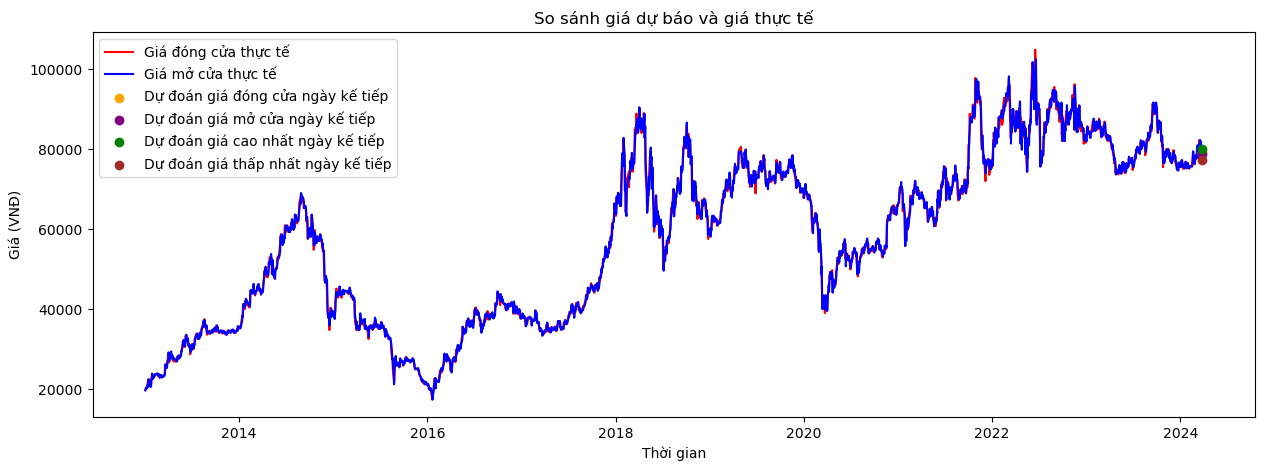

In [44]:

# Lấy ngày kế tiếp sau ngày cuối cùng trong tập dữ liệu để dự đoán
next_date = df['time'].iloc[-1] + pd.Timedelta(days=1)

# Sử dụng mô hình để dự đoán

# Điều chỉnh đoạn code để lấy 50 điểm dữ liệu gần nhất từ cả 'close' và 'open' cho dự đoán
x_next = np.array([sc_train[-50:, :]])  # Lấy 50 bản ghi gần nhất cho cả 'close' và 'open'
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 4))  # Reshape để phù hợp với mô hình

y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)  # Chuyển về giá trị ban đầu

# Thêm dữ liệu dự đoán của ngày kế tiếp vào DataFrame
df_next = pd.DataFrame({'time': [next_date],
                        'close': [y_next_predict[0][0]],
                        'open': [y_next_predict[0][1]],
                        'high': [y_next_predict[0][2]],
                        'low': [y_next_predict[0][3]]})
df1 = pd.concat([df1, df_next.set_index('time')])


# Vẽ biểu đồ mới với dự đoán cho ngày kế tiếp
plt.figure(figsize=(15, 5))
plt.plot(df1.index, df1['close'], label='Giá đóng cửa thực tế', color='red')
plt.plot(df1.index, df1['open'], label='Giá mở cửa thực tế', color='blue')
plt.scatter(df_next['time'], df_next['close'], color='orange', label='Dự đoán giá đóng cửa ngày kế tiếp', zorder=5)
plt.scatter(df_next['time'], df_next['open'], color='purple', label='Dự đoán giá mở cửa ngày kế tiếp', zorder=5)
plt.scatter(df_next['time'], df_next['high'], color='green', label='Dự đoán giá cao nhất ngày kế tiếp', zorder=5)
plt.scatter(df_next['time'], df_next['low'], color='brown', label='Dự đoán giá thấp nhất ngày kế tiếp', zorder=5)

plt.xlabel('Thời gian')
plt.ylabel('Giá (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.show()

In [45]:
# Lấy giá trị đóng cửa và mở cửa của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['close'].iloc[-1]
actual_opening_price = df['open'].iloc[-1]

actual_high_price = df['high'].iloc[-1]
actual_low_price = df['low'].iloc[-1]

# Sử dụng mô hình để dự đoán giá cho ngày kế tiếp (đã thực hiện ở bước trước)

# Tạo DataFrame so sánh giá dự đoán với giá thực tế của ngày cuối cùng trong tập dữ liệu
comparison_df = pd.DataFrame({
    'time': [next_date],
    'Giá đóng cửa dự đoán': [y_next_predict[0][0]],
    'Giá mở cửa dự đoán': [y_next_predict[0][1]],
    'Giá cao nhất dự đoán': [y_next_predict[0][2]],  # Giả sử cột thứ ba là dự đoán giá cao nhất
    'Giá thấp nhất dự đoán': [y_next_predict[0][3]],  # Giả sử cột thứ tư là dự đoán giá thấp nhất
    'Giá đóng cửa thực tế ngày trước': [actual_closing_price],
    'Giá mở cửa thực tế ngày trước': [actual_opening_price],
    'Giá cao nhất thực tế ngày trước': [actual_high_price],
    'Giá thấp nhất thực tế ngày trước': [actual_low_price]
})

# In ra bảng so sánh
comparison_df


,time,Giá đóng cửa dự đoán,Giá mở cửa dự đoán,Giá cao nhất dự đoán,Giá thấp nhất dự đoán,Giá đóng cửa thực tế ngày trước,Giá mở cửa thực tế ngày trước,Giá cao nhất thực tế ngày trước,Giá thấp nhất thực tế ngày trước
0,2024-03-26,78952.703125,78734.875,80166.992188,77372.578125,80400,80500,81400,80100
